# Intro.
- Test Bed 결과 확인


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import configparser
import scipy.io as sio

from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [3]:
# real correspondence list  (dist: 0 ~ 1)
cc_real_corr_list = [[295, 2452], [297, 2450], [299, 2448], [308, 2439], [350, 1398], [351, 1399], [352, 1400], [353, 1401], [354, 1402], [355, 1403], [384, 1440], [385, 1441], [389, 1447], [390, 1448], [391, 1449], [392, 1450], [393, 1451], [394, 1452], [395, 1453], [400, 1460], [401, 1461], [525, 1601], [527, 1603], [528, 1604], [530, 1608], [531, 1609], [532, 1610], [535, 1611], [535, 1613], [536, 1614], [537, 1615], [538, 1616], [539, 1617], [540, 1618], [541, 1617], [541, 1619], [543, 1619], [544, 1620], [545, 1621], [547, 1623], [701, 1769], [702, 1770], [703, 1771], [704, 1772], [705, 1773], [706, 1774], [707, 1775], [709, 1777], [748, 1818], [749, 1819], [750, 1819], [750, 1820], [853, 1929], [939, 2017], [940, 2018], [941, 2019], [942, 2020], [943, 2021], [944, 2022], [945, 2023], [946, 2024], [947, 2025], [948, 2026], [949, 2027], [950, 2028], [951, 2029], [952, 2030], [953, 2031], [954, 2032], [955, 2033], [956, 2034], [957, 2035], [958, 2036], [959, 2037], [960, 2038], [961, 2039], [962, 2040], [963, 2041], [964, 2042], [965, 2043], [985, 2063], [986, 2064], [987, 2065], [988, 2066], [989, 2067], [990, 2068], [991, 2069], [992, 2070], [993, 2071], [994, 2072], [995, 2073], [996, 2074], [1002, 2080], [1003, 2081], [1004, 2082], [1005, 2083], [1073, 2149], [1148, 2222], [1205, 2283], [1206, 2284], [1207, 2285], [1216, 2294], [1225, 2303], [1226, 2304], [1227, 2305], [1228, 2306], [1228, 2308], [1229, 2307], [1230, 2310], [1231, 2311], [1232, 2312], [1233, 2313], [1241, 2319], [1242, 2320], [1243, 2321], [1244, 2322], [1245, 2323], [1247, 2325], [1248, 2326], [1273, 2353], [1275, 2355], [1284, 2362], [1285, 2363], [1286, 2364], [1287, 2365], [1288, 2366], [1289, 2367], [1290, 2368], [1291, 2369], [1296, 2374], [1300, 2378], [1301, 2379], [1302, 2378], [1302, 2380], [1303, 2379], [1303, 2381], [1305, 2381], [1306, 2382], [1341, 2423], [1345, 2425], [1347, 2427], [1348, 2428],[295, 2452], [299, 2448], [354, 1402], [384, 1440], [389, 1447], [391, 1449], [541, 1617], [702, 1770], [704, 1772], [706, 1774], [709, 1777], [748, 1818], [750, 1819], [750, 1820], [1233, 2313], [1273, 2353], [1274, 2354], [1345, 2425], [1347, 2427]]

In [4]:
len(np.unique(cc_real_corr_list))

274

In [5]:
# import shutil
# Manual_LC_dataset = np.unique(np.array(cc_real_corr_list).flatten())
# for idx in Manual_LC_dataset:
#     src = "/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg" % idx
#     dst = "/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre ManualLC/images/"
#     shutil.copy(src,dst)

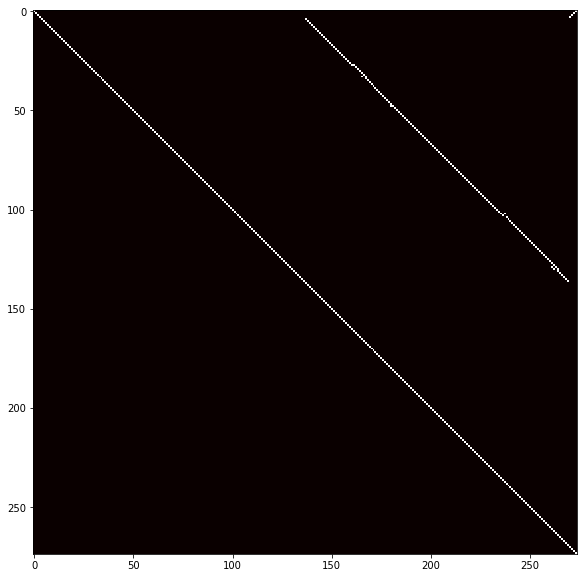

In [6]:
image_idx_order = np.unique(cc_real_corr_list)

GT_corr_mat = np.zeros((len(image_idx_order),len(image_idx_order)))

for a, i in enumerate(image_idx_order):
    for b, j in enumerate(image_idx_order):
        if i==j:
            GT_corr_mat[a,b] = 1
        if [i,j] in cc_real_corr_list:
            GT_corr_mat[a,b] = 1


plt.figure(figsize=(10,10))
plt.imshow(GT_corr_mat, cmap = 'hot')
plt.show()

In [14]:
def PrecisionRecallCurve(GT_corr_mat, esti_corr_mat):

    precision, recall, _ = precision_recall_curve(GT_corr_mat.flatten(), esti_corr_mat.flatten())
    average_precision = average_precision_score(GT_corr_mat.flatten(), esti_corr_mat.flatten())


#     # Plot Precision-Recall curve
#     plt.clf()
#     plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.ylim([0.0, 1.05])
#     plt.xlim([0.0, 1.0])
#     plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
#     plt.legend(loc="lower left")
#     plt.show()
    
    return precision, recall
    
    
def theLatestResult(path_pattern):
    result_dirs = sorted(glob(path_pattern))
    the_latest_result_path = result_dirs[-1]
    print(the_latest_result_path)
    corr_mat_path = the_latest_result_path + '/corr_matrix.txt'
    param_cfg_path = the_latest_result_path + '/parameters.cfg'
    
    config = configparser.ConfigParser()
    config.read(param_cfg_path)
    print(dict(config.items('General')))
    

    return corr_mat_path, param_cfg_path

def theSpecificResult(path):
    corr_mat_path = path + '/corr_matrix.txt'
    param_cfg_path = path + '/output_config.ini'
    
    config = configparser.ConfigParser()
    config.read(param_cfg_path)
    print(dict(config.items('Experiment_parameters')))
    
    return corr_mat_path, param_cfg_path, dict(config.items('Experiment_parameters'))

# K=10, L=5

{'depth_level': '5', 'cluster_center': '10', 'scoring_type': 'L1_NORM', 'exp_method': 'orb', 'eval_dataset': 'City Centre'}
{'depth_level': '5', 'cluster_center': '10', 'scoring_type': 'L1_NORM', 'exp_method': 'brisk', 'eval_dataset': 'City Centre'}
{'cluster_center': '10', 'eval_desc': 'all_desc', 'exp_method': 'proposed method', 'depth_level': '5', 'network_model': 'bigger_feature_size', 'eval_dataset': 'City Centre', 'scoring_type': 'L1_NORM'}
{'cluster_center': '10', 'eval_desc': 'all_desc', 'exp_method': 'SURF', 'depth_level': '5', 'network_model': 'bigger_feature_size', 'eval_dataset': 'City Centre', 'scoring_type': 'L1_NORM'}
{'cluster_center': '10', 'eval_desc': 'all_desc_512dim', 'exp_method': 'proposed method', 'depth_level': '5', 'network_model': 'large-scale-training', 'eval_dataset': 'City Centre', 'scoring_type': 'L1_NORM'}


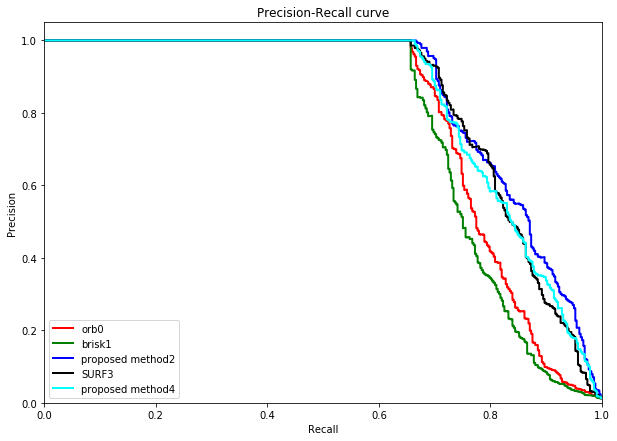

In [15]:
testcases = [
#     '/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-16-07-01',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-16-06-38',
# '/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-15-59-18',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-15-56-31',
# '/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-15-54-50',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-14-36-46',
# '/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-14-29-48',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-14-27-01',
'/home/dongwonshin/Desktop/DBoW2/build2/result/2017-09-12-22-11-27'
]

curve_results = []
for testcase in testcases:
    corr_mat, param_cfg, params = theSpecificResult(testcase)
    esti_corr_mat = np.loadtxt(corr_mat)
    curve_results.append([PrecisionRecallCurve(GT_corr_mat, esti_corr_mat), params])
    
    # Plot Precision-Recall curve
plt.figure(figsize=(10,7))
plt.clf()
cnt = 0
for curve, color in zip(curve_results, ['red','green','blue','black','cyan']):
    plt.plot(curve[0][1], curve[0][0], lw=2, color=color, label=curve[1]['exp_method']+str(cnt))
    cnt +=1

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

# K=5, L=5

{'depth_level': '5', 'cluster_center': '5', 'scoring_type': 'L1_NORM', 'exp_method': 'orb', 'eval_dataset': 'City Centre'}
{'depth_level': '5', 'cluster_center': '5', 'scoring_type': 'L1_NORM', 'exp_method': 'brisk', 'eval_dataset': 'City Centre'}
{'cluster_center': '5', 'eval_desc': 'all_desc', 'exp_method': 'proposed method', 'depth_level': '5', 'network_model': 'bigger_feature_size', 'eval_dataset': 'City Centre', 'scoring_type': 'L1_NORM'}
{'cluster_center': '5', 'eval_desc': 'all_desc', 'exp_method': 'SURF', 'depth_level': '5', 'network_model': 'bigger_feature_size', 'eval_dataset': 'City Centre', 'scoring_type': 'L1_NORM'}
{'cluster_center': '5', 'eval_desc': 'all_desc_512dim', 'exp_method': 'proposed method', 'depth_level': '5', 'network_model': 'large-scale-training', 'eval_dataset': 'City Centre', 'scoring_type': 'L1_NORM'}


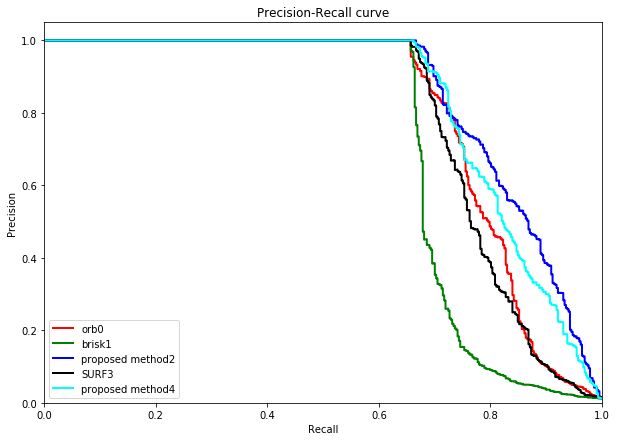

In [21]:
testcases = [
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-17-42-00',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-17-36-41',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-16-53-53',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-16-48-43',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-13-14-36-10'
]

curve_results = []
for testcase in testcases:
    corr_mat, param_cfg, params = theSpecificResult(testcase)
    esti_corr_mat = np.loadtxt(corr_mat)
    curve_results.append([PrecisionRecallCurve(GT_corr_mat, esti_corr_mat), params])
    
# Plot Precision-Recall curve
plt.figure(figsize=(10,7))
plt.clf()
cnt=0
for curve, color in zip(curve_results, ['red','green','blue','black','cyan']):
    plt.plot(curve[0][1], curve[0][0], lw=2, color=color, label=curve[1]['exp_method']+str(cnt))
    cnt+=1

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

# K=8, L=5

{'depth_level': '5', 'cluster_center': '8', 'scoring_type': 'L1_NORM', 'exp_method': 'orb', 'eval_dataset': 'City Centre'}
{'depth_level': '5', 'cluster_center': '8', 'scoring_type': 'L1_NORM', 'exp_method': 'brisk', 'eval_dataset': 'City Centre'}
{'cluster_center': '8', 'eval_desc': 'all_desc', 'exp_method': 'proposed method', 'depth_level': '5', 'network_model': 'bigger_feature_size', 'eval_dataset': 'City Centre', 'scoring_type': 'L1_NORM'}
{'cluster_center': '8', 'eval_desc': 'all_desc', 'exp_method': 'SURF', 'depth_level': '5', 'network_model': 'bigger_feature_size', 'eval_dataset': 'City Centre', 'scoring_type': 'L1_NORM'}


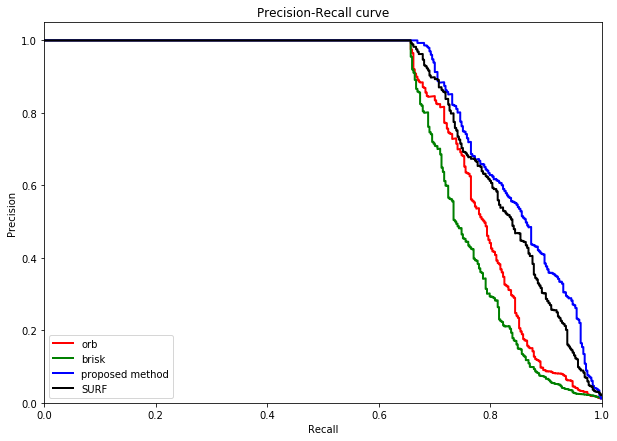

In [17]:
testcases = [
# '/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-18-14-00',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-18-13-40',
# '/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-18-08-37',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-18-06-07',
# '/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-15-25-39',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-14-20-51',
# '/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-14-15-21',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-14-12-42'
]

curve_results = []
for testcase in testcases:
    corr_mat, param_cfg, params = theSpecificResult(testcase)
    esti_corr_mat = np.loadtxt(corr_mat)
    curve_results.append([PrecisionRecallCurve(GT_corr_mat, esti_corr_mat), params])
    
    # Plot Precision-Recall curve
plt.figure(figsize=(10,7))
plt.clf()
for curve, color in zip(curve_results, ['red','green','blue','black']):
    plt.plot(curve[0][1], curve[0][0], lw=2, color=color, label=curve[1]['exp_method'])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

# K=15, L=5

{'depth_level': '5', 'cluster_center': '15', 'scoring_type': 'L1_NORM', 'exp_method': 'orb', 'eval_dataset': 'City Centre'}
{'depth_level': '5', 'cluster_center': '15', 'scoring_type': 'L1_NORM', 'exp_method': 'brisk', 'eval_dataset': 'City Centre'}
{'cluster_center': '15', 'eval_desc': 'all_desc', 'exp_method': 'proposed method', 'depth_level': '5', 'network_model': 'bigger_feature_size', 'eval_dataset': 'City Centre', 'scoring_type': 'L1_NORM'}
{'cluster_center': '15', 'eval_desc': 'all_desc', 'exp_method': 'SURF', 'depth_level': '5', 'network_model': 'bigger_feature_size', 'eval_dataset': 'City Centre', 'scoring_type': 'L1_NORM'}
{'cluster_center': '15', 'eval_desc': 'all_desc_512dim', 'exp_method': 'proposed method', 'depth_level': '5', 'network_model': 'large-scale-training', 'eval_dataset': 'City Centre', 'scoring_type': 'L1_NORM'}


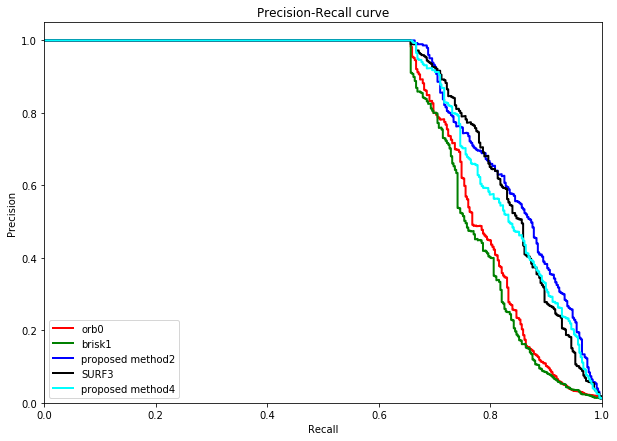

In [20]:
testcases = [
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-07-02-59-32',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-07-02-44-58',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-20-21-09',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-20-07-26',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-13-14-29-59'
]

curve_results = []
for testcase in testcases:
    corr_mat, param_cfg, params = theSpecificResult(testcase)
    esti_corr_mat = np.loadtxt(corr_mat)
    curve_results.append([PrecisionRecallCurve(GT_corr_mat, esti_corr_mat), params])
    
# Plot Precision-Recall curve
plt.figure(figsize=(10,7))
plt.clf()
cnt=0
for curve, color in zip(curve_results, ['red','green','blue','black','cyan']):
    plt.plot(curve[0][1], curve[0][0], lw=2, color=color, label=curve[1]['exp_method']+str(cnt))
    cnt+=1

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()